# Task 1. Analytics
Проведите визуальный анализ данных: 
- посмотрите на распределения 
- поищите инсайты
- заполните пропуски
- пронализируйте связи между признаками, а также связи признаков с целевой переменной
- опишите свои находки и комментируйте свои шаги
- предположите, какие модели можно было бы использовать, опираясь на свои находки

Датасет представляет собой данные различных винах, для которых нужно предсказать качество
Детальнее о данных по ссылке https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error, classification_report, confusion_matrix, mean_absolute_error
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [1]:
wine_data = pd.read_csv('data/wine_quality.csv')

NameError: name 'pd' is not defined

## Изучаем данные

In [7]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
wine_data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [14]:
wine_data.shape

(6497, 13)

In [15]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           5847 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6039 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [16]:
#посмотрим на пропуски в данных, чуть позже вернемся к заполнению пропусков
print(wine_data.isna().sum())

fixed acidity             0
volatile acidity          0
citric acid             650
residual sugar            0
chlorides               458
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
type                      0
dtype: int64


In [17]:
print(wine_data.isna().mean().round(2))

fixed acidity           0.00
volatile acidity        0.00
citric acid             0.10
residual sugar          0.00
chlorides               0.07
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
pH                      0.00
sulphates               0.00
alcohol                 0.00
quality                 0.00
type                    0.00
dtype: float64


In [13]:
wine_data['citric acid'].median()

0.31

In [18]:
# Смотрим распределение целевой переменной
wine_data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
wine_data.quality.nunique()

7

<AxesSubplot:xlabel='quality', ylabel='Count'>

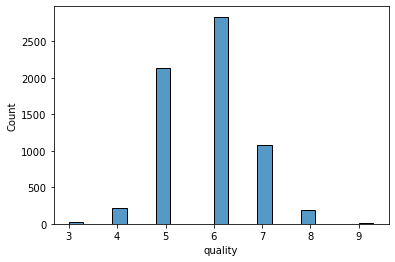

In [79]:
sns.histplot(data=wine_data, x="quality", binwidth=0.3)

<AxesSubplot:xlabel='quality', ylabel='Count'>

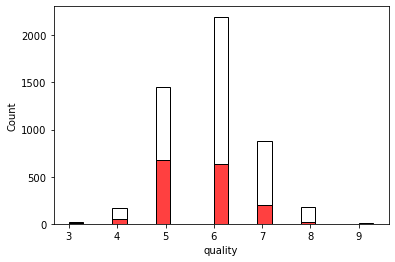

In [80]:
# Строим гистограммы, чтобы понять есть ли зависимость между целевой переменно
sns.histplot(data=wine_data[wine_data['type'] == 'white'], x="quality", color='white', binwidth=0.3)
sns.histplot(data=wine_data[wine_data['type'] == 'red'], x="quality", color='red', binwidth=0.3)

In [ ]:
#можно сделать вывод, что белое вино в среднем оценивают лучше. Также это подтверждается таблицей ниже

In [101]:
wine_data.groupby(['type'])['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [48]:
wine_data.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [104]:
# посмотрим на корреляции признаков
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.328925,-0.111981,0.288951,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.374778,-0.196011,0.371338,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.328925,-0.374778,1.000000,0.135945,0.059257,0.131056,0.190187,0.099410,-0.321629,0.066180,-0.007491,0.084651
residual sugar,-0.111981,-0.196011,0.135945,1.000000,-0.156843,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.288951,0.371338,0.059257,-0.156843,1.000000,-0.214938,-0.302963,0.315840,0.037058,0.393706,-0.203499,-0.174396
free sulfur dioxide,-0.282735,-0.352557,0.131056,0.402871,-0.214938,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.190187,0.495482,-0.302963,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.099410,0.552517,0.315840,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.321629,-0.267320,0.037058,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.066180,-0.185927,0.393706,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


<AxesSubplot:>

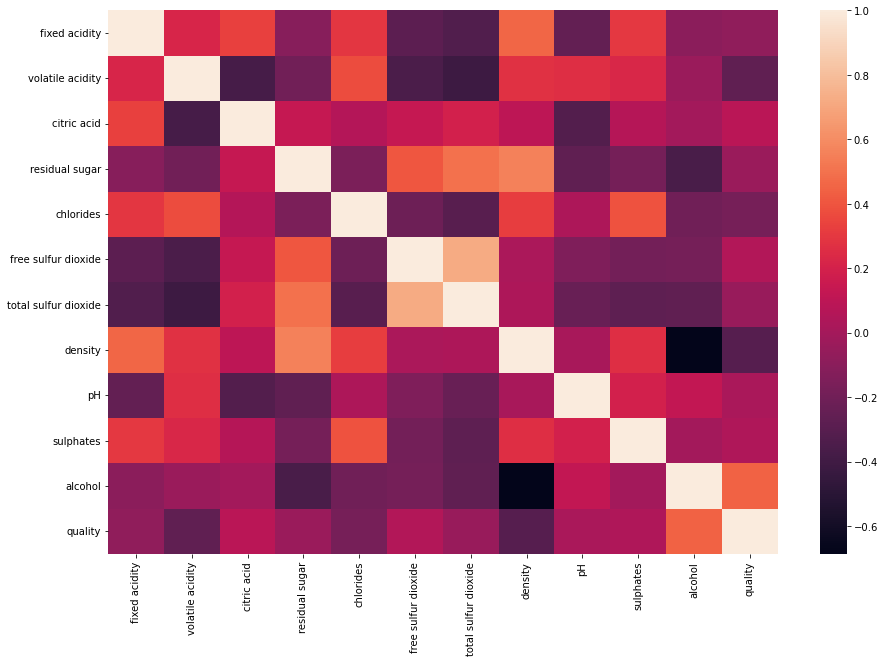

In [113]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(wine_data.corr())

Построим phik корреляцию, которая также делать считает корреляцию между категориальными переменными и может находить нелинейную зависимость

In [115]:
phik_overview = wine_data.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.00,0.30,0.33,0.18,0.24,0.21,0.45,0.51,0.39,0.26,0.46,0.10,0.65
volatile acidity,0.30,1.00,0.42,0.22,0.25,0.26,0.51,0.21,0.36,0.21,0.22,0.29,0.83
citric acid,0.33,0.42,1.00,0.17,0.32,0.16,0.40,0.25,0.29,0.33,0.17,0.13,0.42
residual sugar,0.18,0.22,0.17,1.00,0.13,0.27,0.40,0.96,0.24,0.19,0.37,0.07,0.48
chlorides,0.24,0.25,0.32,0.13,1.00,0.13,0.21,0.19,0.17,0.68,0.10,0.11,0.39
free sulfur dioxide,0.21,0.26,0.16,0.27,0.13,1.00,0.76,0.08,0.13,0.14,0.16,0.37,0.39
total sulfur dioxide,0.45,0.51,0.40,0.40,0.21,0.76,1.00,0.33,0.30,0.30,0.40,0.26,0.94
density,0.51,0.21,0.25,0.96,0.19,0.08,0.33,1.00,0.13,0.18,0.55,0.25,0.45
pH,0.39,0.36,0.29,0.24,0.17,0.13,0.30,0.13,1.00,0.23,0.28,0.06,0.43
sulphates,0.26,0.21,0.33,0.19,0.68,0.14,0.30,0.18,0.23,1.00,0.19,0.12,0.47


<AxesSubplot:>

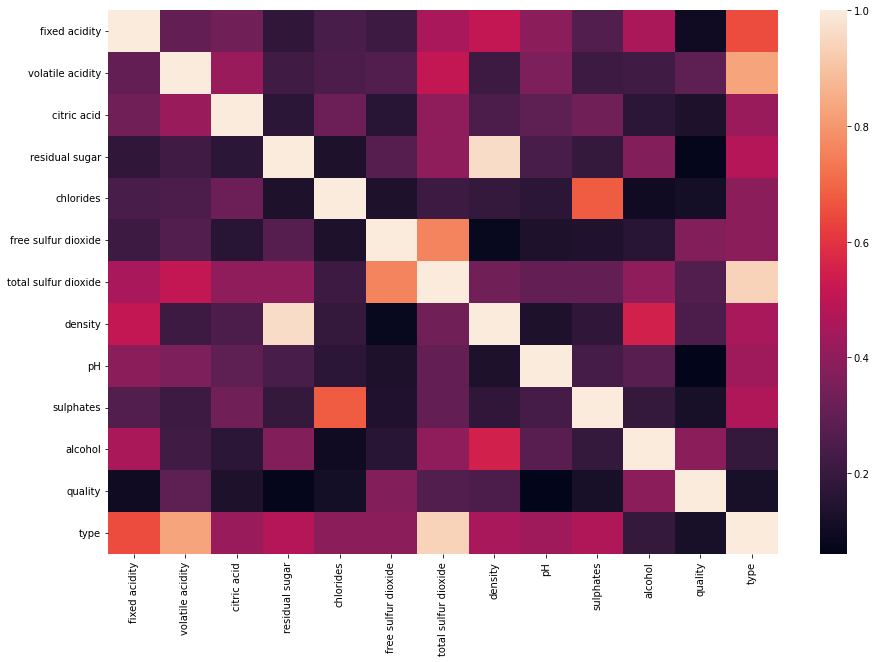

In [117]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(phik_overview.round(2))

In [127]:
#вот наиболее важные признаки по мнению phik, от которых зависит качество вина

phik_overview.round(2).sort_values('quality', ascending=False).head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
quality,0.10,0.29,0.13,0.07,0.11,0.37,0.26,0.25,0.06,0.12,0.39,1.00,0.12
alcohol,0.46,0.22,0.17,0.37,0.10,0.16,0.40,0.55,0.28,0.19,1.00,0.39,0.19
free sulfur dioxide,0.21,0.26,0.16,0.27,0.13,1.00,0.76,0.08,0.13,0.14,0.16,0.37,0.39
volatile acidity,0.30,1.00,0.42,0.22,0.25,0.26,0.51,0.21,0.36,0.21,0.22,0.29,0.83
total sulfur dioxide,0.45,0.51,0.40,0.40,0.21,0.76,1.00,0.33,0.30,0.30,0.40,0.26,0.94
density,0.51,0.21,0.25,0.96,0.19,0.08,0.33,1.00,0.13,0.18,0.55,0.25,0.45


важные признаки получились достаточно логичными. Например, диоксид серы(консервант) вероятно коррелирует со стоимостью вина, так как дешевые вина производят с большим его добавлением. Алкоголь

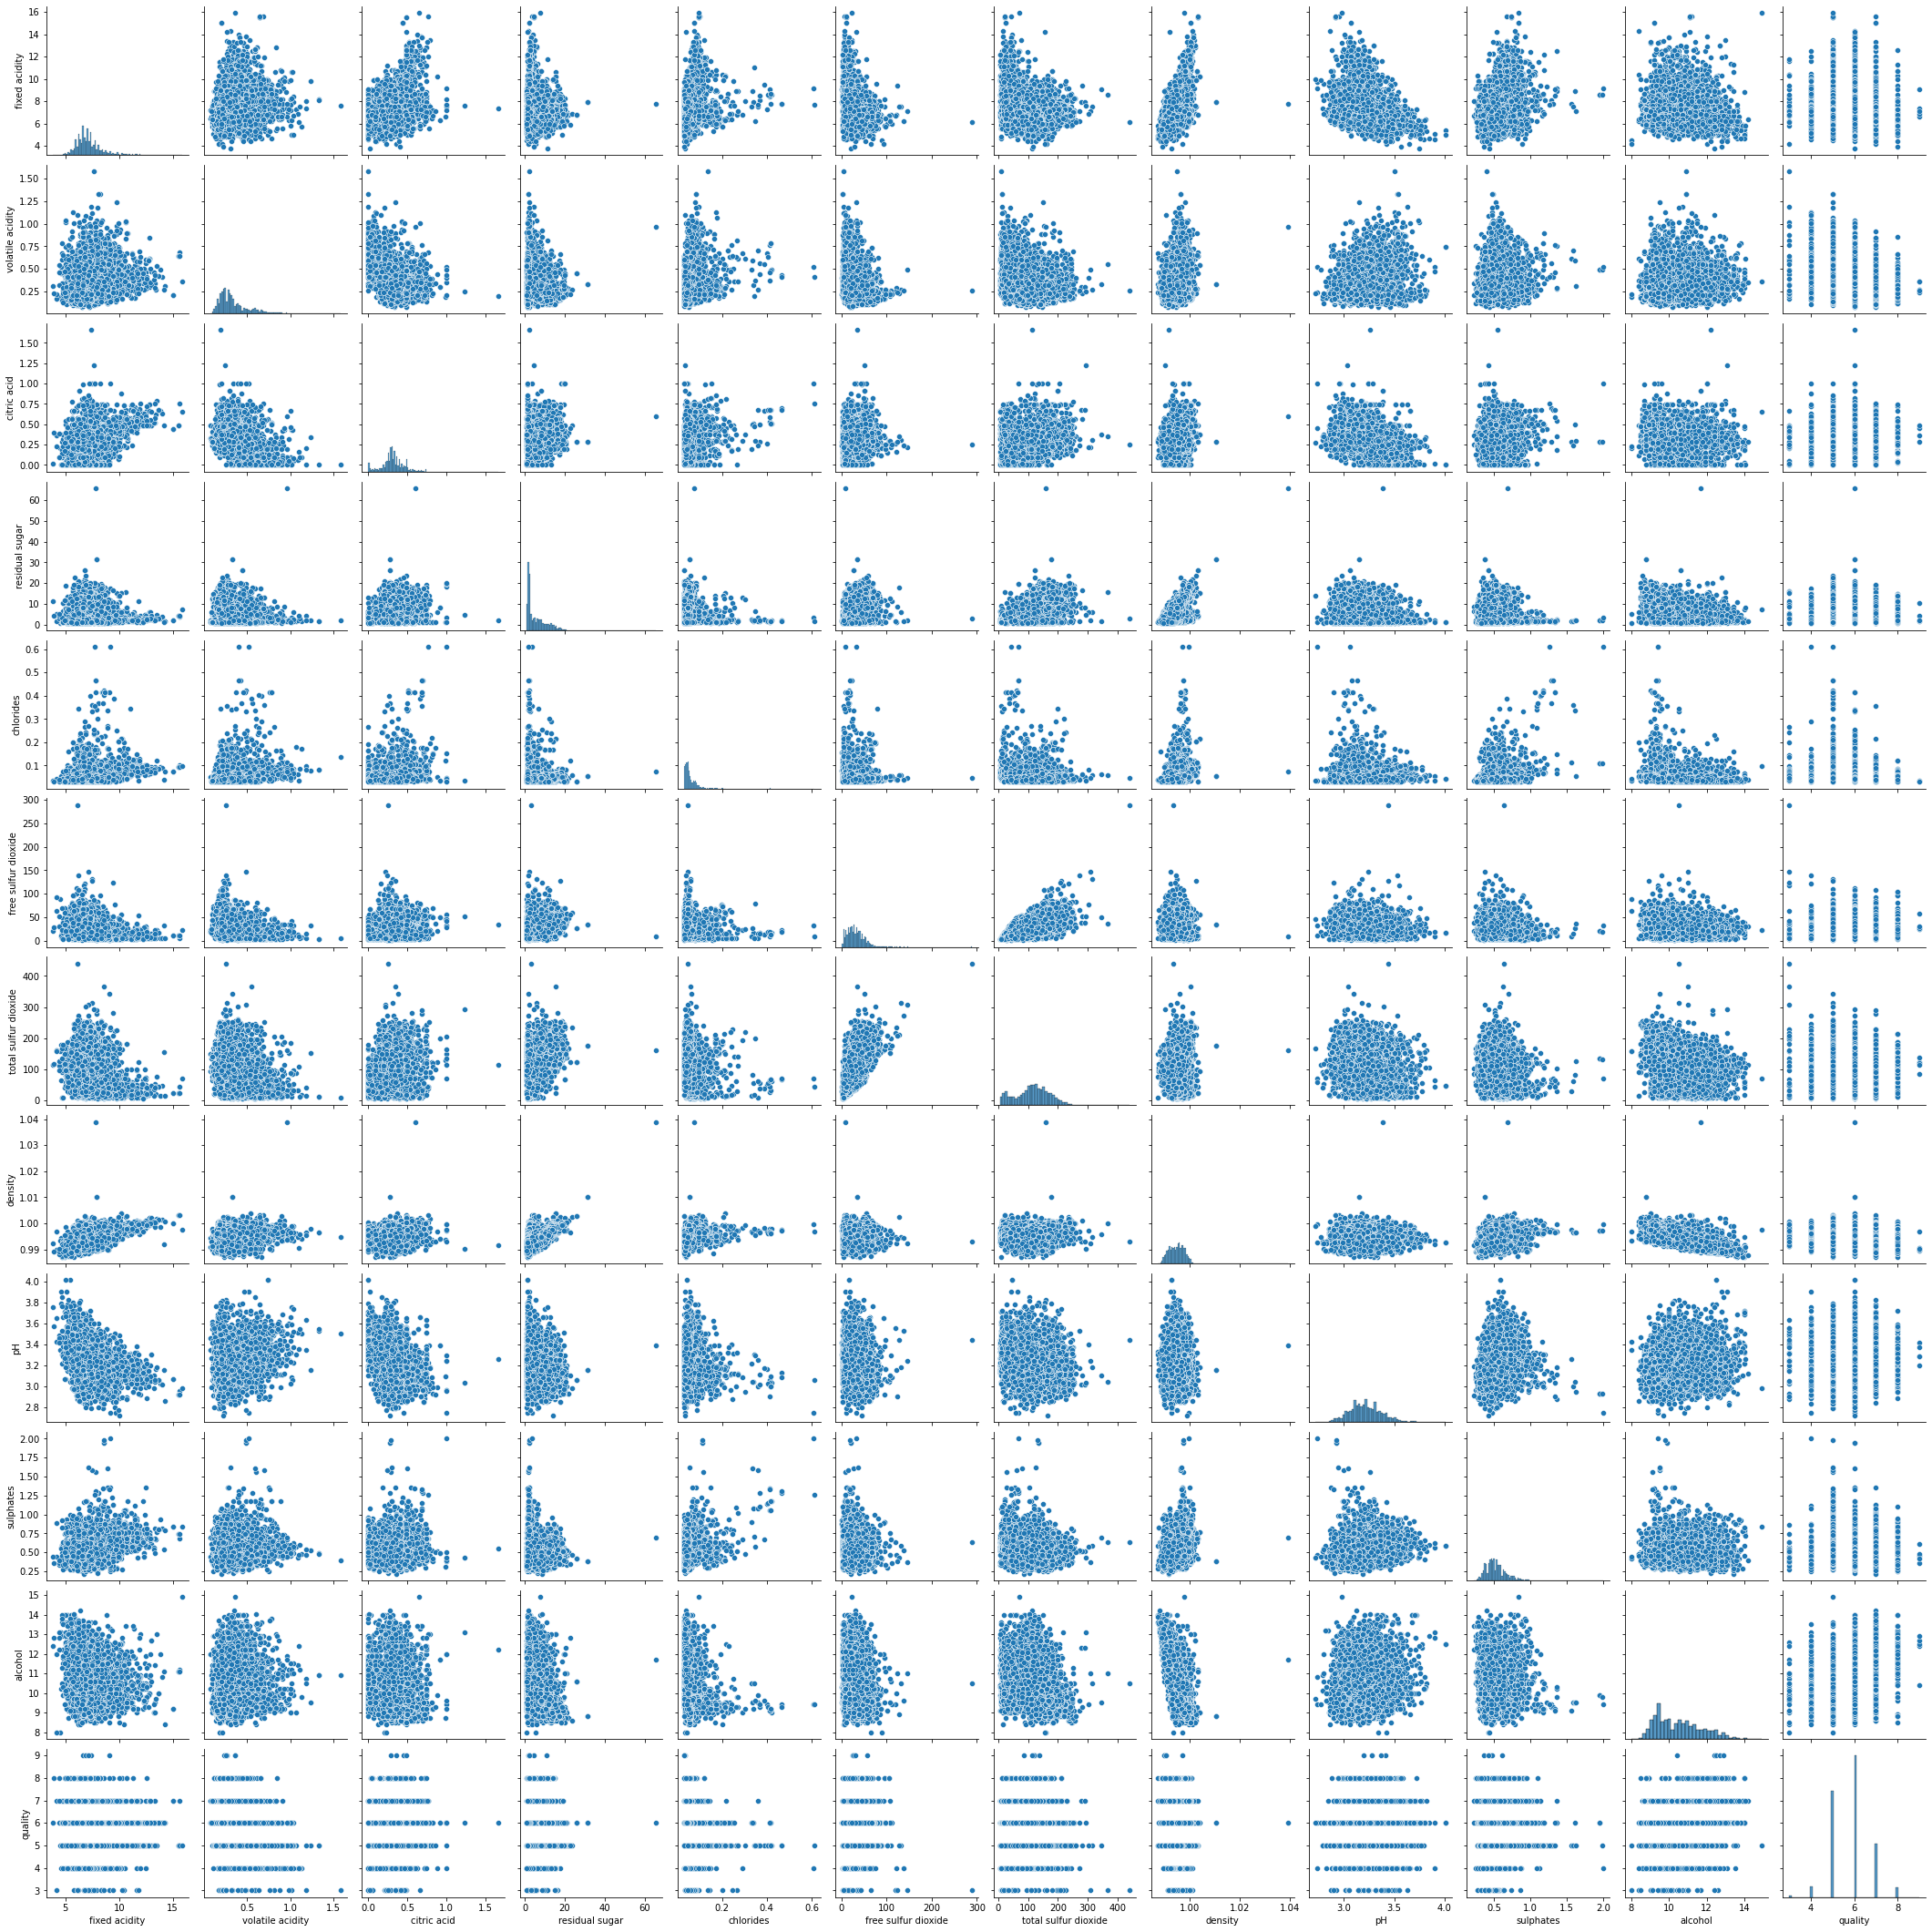

In [114]:
#Построим pairplot
sns.pairplot(wine_data)

In [28]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

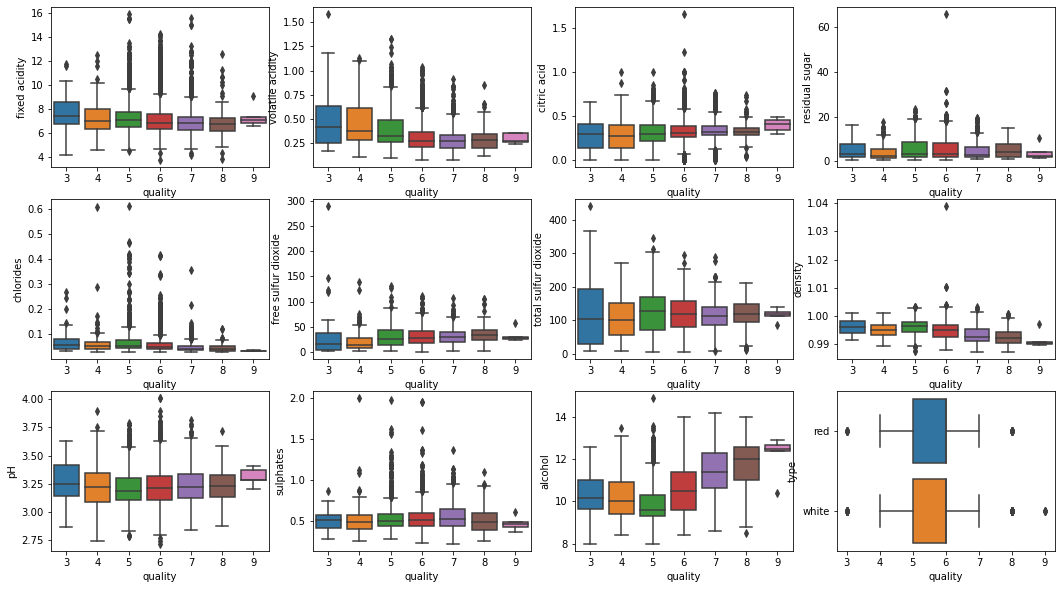

In [44]:
# посмотрим распределиния признаков в зависимости от качества вина
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
X = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']
y = 'quality'
for i, feat in enumerate(X):
    sns.boxplot(ax=axes[i//4, i%4], data=wine_data, x=y, y=feat)

видим, что некоторые признаки сильно имеют существенно разные распределения в зависимости от качества. В частности есть некоторые признаки с очень высоким значением признака, который однозначно свидетельствует о низком качестве вина. Скорее всего будут хорошо работать "деревянные" модели и производные от них. В том числе "деревянные" модели будут хороши, если мы будем решать эту задачу, как задачу регрессии, так как деревянные модели не предскажут качества больше 9.

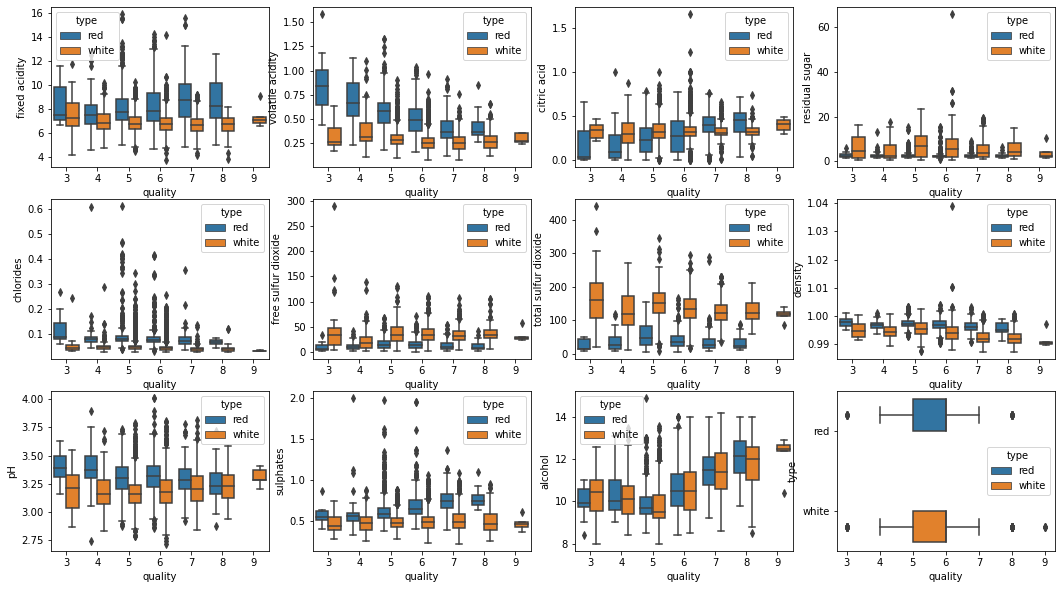

In [103]:
# добавим еще и тип вина, которой очевидно будет одним из важных признаков, 
# так распределение признаков сильно зависит от типа вина (красное, белое)
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
X = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']
y = 'quality'
for i, feat in enumerate(X):
    sns.boxplot(ax=axes[i//4, i%4], data=wine_data, x=y, y=feat, hue='type')

Поанализируем пропуски в данных чуть детальнее

In [180]:
wine_data.isna().sum()

fixed acidity             0
volatile acidity          0
citric acid             650
residual sugar            0
chlorides               458
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
type                      0
dtype: int64

In [178]:
(wine_data['citric acid'].isna() | wine_data['chlorides'].isna()).sum()

1065

In [179]:
(wine_data['citric acid'].isna() & wine_data['chlorides'].isna()).sum()

43

Видим, что пропуски не очень пересекаются. То есть, пропуски в разных наблюдениях. Попробуем поисследовать распределения признаков в наблюдениях с пропусками и без них

In [207]:
# добавим столбец, который показывает есть ли пропуск 
wine_data['isna'] = (wine_data['citric acid'].isna() | wine_data['chlorides'].isna()).astype('int')

In [244]:
# построим таблицу в которой сравним распределение вина с пропусками и без
df_agg = wine_data.groupby(['isna', 'type'])['quality'] \
    .agg(['mean',
          'median',
          'count']) \
    .reset_index() \
    .rename(columns={'mean': 'mean_quality',
                     'median': 'median_quality',
                     'count': 'count_quality'})

In [245]:
# для расчета доли вина
qual_for_pers = wine_data.groupby(['isna', 'type'])['quality'] \
    .agg('count') \
    .groupby(['isna']) \
    .transform(sum) \
    .reset_index()['quality']

In [246]:
df_agg['count_%'] = df_agg['count_quality'] / qual_for_pers

In [248]:
df_agg.round(2)

,isna,type,mean_quality,median_quality,count_quality,count_%
0,0,red,5.65,6.0,1437,0.26
1,0,white,5.83,6.0,3995,0.74
2,1,red,5.56,5.0,162,0.15
3,1,white,6.10,6.0,903,0.85


видим, что распределение с пропусками и без существенно отличается. Например доля красного вина в данных с пропусками - 26%, без пропусков - 15%
поэтому заполнять пропуски будем с оглядкой на качество вина и на тип вина

#### Заполнение пропусков

In [253]:
wine_data[wine_data['isna'] == 1].quality.value_counts()

6    465
5    271
7    242
8     55
4     25
3      5
9      2
Name: quality, dtype: int64

In [255]:
wine_data.isna().sum()

fixed acidity             0
volatile acidity          0
citric acid             650
residual sugar            0
chlorides               458
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
type                      0
isna                      0
dtype: int64

In [271]:
# заполняем пропуски двумя вариантами: медианой и средним
name = 'citric acid_na_mean'
wine_data[name] = wine_data['citric acid']
wine_data[name] = wine_data.groupby(['quality', 'type'])[name].transform(lambda x: x.fillna(x.mean()))

name = 'citric acid_na_median'
wine_data[name] = wine_data['citric acid']
wine_data[name] = wine_data.groupby(['quality', 'type'])[name].transform(lambda x: x.fillna(x.median()))
wine_data[wine_data['isna'] == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,isna,sdfg,citric acid_na_mean,citric acid_na_median
7,7.3,0.650,NaN,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,red,1,0.379247,0.379247,0.40
43,8.1,0.660,NaN,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.30,5,red,1,0.245648,0.245648,0.23
45,4.6,0.520,NaN,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,4,red,1,0.180213,0.180213,0.09
52,6.6,0.500,NaN,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.40,6,red,1,0.277042,0.277042,0.27
103,8.1,0.575,NaN,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.20,5,red,1,0.245648,0.245648,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,6.2,0.210,NaN,5.7,NaN,45.0,121.0,0.99168,3.21,1.08,12.15,7,white,1,0.325038,0.325038,0.31
6486,6.2,0.410,0.22,1.9,NaN,5.0,56.0,0.98928,3.04,0.79,13.00,7,white,1,0.220000,0.220000,0.22
6492,6.2,0.210,NaN,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.20,6,white,1,0.337647,0.337647,0.32
6495,5.5,0.290,0.30,1.1,NaN,20.0,110.0,0.98869,3.34,0.38,12.80,7,white,1,0.300000,0.300000,0.30


In [272]:
# заполняем пропуски двумя вариантами: медианой и средним
name = 'chlorides_na_mean'
wine_data[name] = wine_data['chlorides']
wine_data[name] = wine_data.groupby(['quality', 'type'])[name].transform(lambda x: x.fillna(x.mean()))

name = 'chlorides_na_median'
wine_data[name] = wine_data['chlorides']
wine_data[name] = wine_data.groupby(['quality', 'type'])[name].transform(lambda x: x.fillna(x.median()))
wine_data[wine_data['isna'] == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,isna,sdfg,citric acid_na_mean,citric acid_na_median,chlorides_na_mean,chlorides_na_median
7,7.3,0.650,NaN,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7,red,1,0.379247,0.379247,0.40,0.065000,0.065
43,8.1,0.660,NaN,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.30,5,red,1,0.245648,0.245648,0.23,0.069000,0.069
45,4.6,0.520,NaN,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.10,4,red,1,0.180213,0.180213,0.09,0.054000,0.054
52,6.6,0.500,NaN,2.1,0.068,6.0,14.0,0.99550,3.39,0.64,9.40,6,red,1,0.277042,0.277042,0.27,0.068000,0.068
103,8.1,0.575,NaN,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.20,5,red,1,0.245648,0.245648,0.23,0.077000,0.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,6.2,0.210,NaN,5.7,NaN,45.0,121.0,0.99168,3.21,1.08,12.15,7,white,1,0.325038,0.325038,0.31,0.040892,0.039
6486,6.2,0.410,0.22,1.9,NaN,5.0,56.0,0.98928,3.04,0.79,13.00,7,white,1,0.220000,0.220000,0.22,0.040892,0.039
6492,6.2,0.210,NaN,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.20,6,white,1,0.337647,0.337647,0.32,0.039000,0.039
6495,5.5,0.290,0.30,1.1,NaN,20.0,110.0,0.98869,3.34,0.38,12.80,7,white,1,0.300000,0.300000,0.30,0.040892,0.039


In [276]:
wine_data.isna().sum()

fixed acidity              0
volatile acidity           0
citric acid              650
residual sugar             0
chlorides                458
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
type                       0
isna                       0
citric acid_na_mean        0
citric acid_na_median      0
chlorides_na_mean          0
chlorides_na_median        0
dtype: int64

# Task 2. Modelling
Постройте несколько моделей и выберите лучшую: 
- выберите способ валидации и разделите выборку
- выберите метрики для оценки качества модели
- постройте простую модель, так называемый baseline, с которым можно будет сравнивать дальнейшие эксперименты
- постройте еще 1-2 модели, посмотрите, как изменяются метрики
- попробуйте улучшить гиперпараметры
- попробуйте поэкспериментировать с фичами, например сделать производные афичи или использовать взаимосвязи
- проведите отбор признаков
- отберите финальную модель, расчитайте финальные метрики и прокомментируйте результат

- выберите способ валидации и разделите выборку

Так как данных немного будем делить выборку на трэйн и тест стратифицированным образом, чтобы в каждой группе были примерно в одной пропорции вина в разрезе типов вина и качества.

- выберите метрики для оценки качества модели



In [318]:
#заменим тип вина на бинарный признак
wine_data['type_binary'] = wine_data['type'].map({'white': 0, 'red': 1})

In [447]:
wine_data.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [452]:
train, test = train_test_split(wine_data, test_size=0.2, random_state=42, stratify=wine_data['quality'])
#test, val = train_test_split(test, test_size=0.5, random_state=42, stratify=test['quality'])

In [453]:
train[y].value_counts()

6    2269
5    1710
7     863
4     173
8     154
3      24
9       4
Name: quality, dtype: int64

In [454]:
train.quality.value_counts(normalize=True)

6    0.436598
5    0.329036
7    0.166057
4    0.033288
8    0.029632
3    0.004618
9    0.000770
Name: quality, dtype: float64

In [464]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'isna',
       'citric acid_na_mean', 'citric acid_na_median', 'chlorides_na_mean',
       'chlorides_na_median', 'type_binary'],
      dtype='object')

In [465]:
X_na_median = ['fixed acidity', 'volatile acidity', 'residual sugar',
               'free sulfur dioxide', 'total sulfur dioxide', 'density',
               'pH', 'sulphates', 'alcohol', 'isna',
               'citric acid_na_median','chlorides_na_median', 'type_binary']

In [466]:
X_na_mean = ['fixed acidity', 'volatile acidity', 'residual sugar',
             'free sulfur dioxide', 'total sulfur dioxide',
             'density','pH', 'sulphates',
             'alcohol', 'isna',
             'citric acid_na_mean', 'chlorides_na_mean', 'type_binary']

In [467]:
y = 'quality'

In [487]:
rf = RandomForestClassifier(n_estimators=500)

In [488]:
rf.fit(train[X_na_mean], train[y])

RandomForestClassifier(n_estimators=500)

In [489]:
pred = rf.predict(test[X_na_mean])

In [490]:
accuracy_score(test[y], pred)

0.7176923076923077

In [494]:
print(classification_report(test[y], pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.67      0.09      0.16        43
           5       0.75      0.72      0.73       428
           6       0.69      0.82      0.75       567
           7       0.73      0.64      0.68       216
           8       1.00      0.44      0.61        39
           9       0.00      0.00      0.00         1

    accuracy                           0.72      1300
   macro avg       0.55      0.39      0.42      1300
weighted avg       0.72      0.72      0.71      1300



C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [495]:
params = {'random_seed': 42,
          'verbose': 100,
    #      'learning_rate': 0.05,
          'loss_function': 'MultiClass',
          'eval_metric': 'AUC'}
model = CatBoostClassifier(**params)
model.fit(train[X_na_mean], train[y])
pred = model.predict(test[X_na_mean])
accuracy_score(test[y], pred)

Learning rate set to 0.086065
0:	total: 40.7ms	remaining: 40.7s
100:	total: 1.47s	remaining: 13.1s
200:	total: 3.1s	remaining: 12.3s
300:	total: 4.73s	remaining: 11s
400:	total: 6.4s	remaining: 9.56s
500:	total: 7.92s	remaining: 7.89s
600:	total: 9.41s	remaining: 6.25s
700:	total: 11s	remaining: 4.67s
800:	total: 12.4s	remaining: 3.09s
900:	total: 14s	remaining: 1.54s
999:	total: 15.4s	remaining: 0us


0.703076923076923

In [496]:
print(classification_report(test[y], pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.35      0.14      0.20        43
           5       0.73      0.71      0.72       428
           6       0.70      0.79      0.74       567
           7       0.68      0.65      0.67       216
           8       0.86      0.46      0.60        39
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.47      0.39      0.42      1300
weighted avg       0.70      0.70      0.69      1300



C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
params = {'random_seed': 42,
          'verbose': 100,
    #      'learning_rate': 0.05,
          'loss_function': 'MultiClass',
          'eval_metric': 'AUC'}
model = CatBoostClassifier(**params)
model.fit(train[X_na_mean], train[y])
pred = model.predict(test[X_na_mean])
accuracy_score(test[y], pred)

print(classification_report(test[y], pred))

In [ ]:
X_na_mean = ['fixed acidity', 'volatile acidity', 'residual sugar',
             'free sulfur dioxide', 'total sulfur dioxide',
             'density','pH', 'sulphates',
             'alcohol', 'isna',
             'citric acid_na_mean', 'chlorides_na_mean']
cat_features = ['type']
params = {'random_seed': 42,
          'verbose': 100,
    #      'learning_rate': 0.05,
          'loss_function': 'MultiClass',
          'eval_metric': 'AUC'}
model = CatBoostClassifier(**params)
model.fit(train[X_na_mean], train[y])
pred = model.predict(test[X_na_mean])
accuracy_score(test[y], pred)

print(classification_report(test[y], pred))

In [471]:
accuracy_score(test[y], pred)

0.7123076923076923

In [481]:
lr = LogisticRegression()
lr.fit(scaler.transform(train[X_na_mean]), train[y])
pred = lr.predict(scaler.transform(test[X_na_mean]))
accuracy_score(test[y], pred)

C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5438461538461539

In [385]:
params = {'random_seed': 42,
          'verbose': 100,
    #      'learning_rate': 0.05,
          'loss_function': 'MultiClass',
          'eval_metric': 'AUC'}

In [386]:
model = CatBoostClassifier(**params)

In [387]:
model.fit(train[X_na_mean], train[y], eval_set=(val[X_na_mean], val[y]))

Learning rate set to 0.111595
0:	test: 0.6688116	best: 0.6688116 (0)	total: 24.7ms	remaining: 24.7s
100:	test: 0.9253390	best: 0.9253390 (100)	total: 1.49s	remaining: 13.2s
200:	test: 0.9567705	best: 0.9567705 (200)	total: 2.9s	remaining: 11.5s
300:	test: 0.9608154	best: 0.9612536 (272)	total: 4.31s	remaining: 10s
400:	test: 0.9607525	best: 0.9612838 (384)	total: 5.71s	remaining: 8.52s
500:	test: 0.9605845	best: 0.9612838 (384)	total: 7.09s	remaining: 7.07s
600:	test: 0.9602727	best: 0.9612838 (384)	total: 8.5s	remaining: 5.64s
700:	test: 0.9597631	best: 0.9612838 (384)	total: 9.93s	remaining: 4.24s
800:	test: 0.9599886	best: 0.9612838 (384)	total: 11.3s	remaining: 2.82s
900:	test: 0.9601496	best: 0.9612838 (384)	total: 12.8s	remaining: 1.4s
999:	test: 0.9597738	best: 0.9612838 (384)	total: 14.1s	remaining: 0us

bestTest = 0.9612837808
bestIteration = 384

Shrink model to first 385 iterations.


In [451]:
mean_squared_error(test[y], pred)

ValueError: Found input variables with inconsistent numbers of samples: [1300, 650]

In [397]:
mean_absolute_percentage_error(test[y], pred)

0.06827289377289378

In [388]:
pred = model.predict(test[X_na_mean])
accuracy_score(test[y], pred)

0.6692307692307692

In [380]:
pred = model.predict(test[X_na_mean])
accuracy_score(test[y], pred)

0.6692307692307692

In [400]:
rfr = RandomForestRegressor()

In [407]:
rfr.fit(train[X_na_mean], train[y])

RandomForestRegressor()

In [416]:
pred = rfr.predict(test[X_na_mean]).round()

In [418]:
mean_absolute_percentage_error(test[y], pred)

0.06642673992673992

In [419]:
mean_squared_error(test[y], pred)

0.44153846153846155

In [450]:
accuracy_score(test[y], pred)

ValueError: Found input variables with inconsistent numbers of samples: [1300, 650]

In [449]:
mean_absolute_error(test[y], pred)

ValueError: Found input variables with inconsistent numbers of samples: [1300, 650]

In [403]:
tra

1916    5
947     7
877     6
2927    6
6063    5
       ..
3772    5
5191    7
5226    5
5390    5
860     5
Name: quality, Length: 5197, dtype: int64

In [424]:
print(classification_report(test[y], pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.50      0.04      0.08        23
           5       0.70      0.74      0.72       217
           6       0.64      0.77      0.70       280
           7       0.72      0.54      0.62       107
           8       1.00      0.26      0.42        19

    accuracy                           0.68       650
   macro avg       0.59      0.39      0.42       650
weighted avg       0.68      0.68      0.66       650



C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikhail.solodukhin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [425]:
test[y].value_counts()

6    280
5    217
7    107
4     23
8     19
3      4
Name: quality, dtype: int64

In [429]:
matrix = confusion_matrix(test[y], pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.        , 0.04347826, 0.73732719, 0.76785714, 0.54205607,
       0.26315789])

In [430]:
matrix.diagonal()

array([  0,   1, 160, 215,  58,   5], dtype=int64)

# Task 3. Production
Представим, что мы не обладаем знаниями о качестве вина из датасета. Однако мы хотим сделать сервис для онлайн-магазина вина, который показывал бы на карточке товара его качество.

Создайте сервис на фреймворке FastAPI, который по индексу из датасета (представим, что это идентификатор вина) будет возвращать предсказанное вашей моделью качество этого вина:
- используя docker-compose файл, создайте базу данных postgres, куда сохраните свой датасет
- напишите сервис, который будет принимать на вход индентификатор из датасета, доставать необходимые данные, делать предикт вашей моделью и возвращать результат
- добавьте этот сервис также в docker-compose файл